# Problem 3


In [1]:
#Load the data and split
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

hw4reg = pickle.load(open('hw4reg.pkl', 'rb'))

x_train  = hw4reg['data'] ## .astype(float)
y_train = hw4reg['labels']
n = x_train.shape
x_val = hw4reg['valdata']
y_val = hw4reg['vallabels']
x_test = hw4reg['testdata']
y_test = hw4reg['testlabels']
regGrid = hw4reg['grid']
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print(type(x_train))
print(type(y_train))
print(regGrid.shape)


(500,)
(500,)
(100,)
(100,)
(500,)
(500,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000,)


In [2]:
# Part (a)
# Define the kernel function k(x, z)
def kernel_function(x, z):
    return np.minimum(x, z)

# Check if k is positive definite
def is_positive_definite(K):
    eigenvalues, _ = np.linalg.eigh(K)
    return np.all(eigenvalues >= 0)
def kernel_matrix(x_train, z_train):
    n = x_train.shape[0]
    m = z_train.shape[0]
    ans = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            x = x_train[i]
            z = z_train[j]
            ans[i,j] = kernel_function(x,z)
    return ans
# Test the kernel function for positivity
K_test = kernel_matrix(x_train, x_train)
positive_definite = is_positive_definite(K_test)
print("Is k positive definite?", positive_definite)




Is k positive definite? True


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


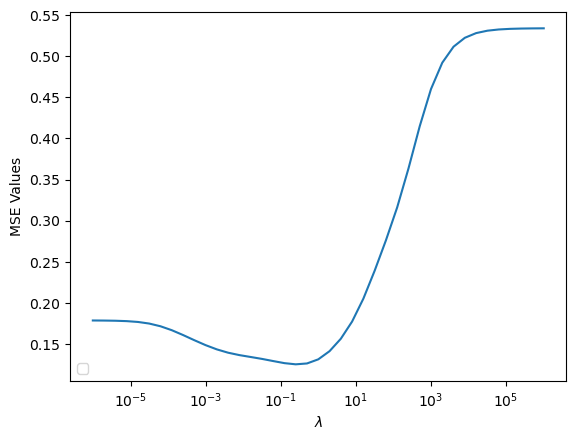

Best Lambda: 0.25 Best MSE: 0.1251924877940191


In [3]:

# Part (b)
def kernel_ridge_regression(x_train, y_train, x_val, y_val, lambdas):
    mse_values = []

    for curLambda_ in lambdas:
        # Compute the kernel matrix K
#         K = kernel_function(X[:, None], X[None, :])
        K = kernel_matrix(x_train, x_train)
        # Regularization term
        reg_term = curLambda_ * np.eye(len(x_train))
        # Solve the linear system (K + λI)α = y
        alpha = np.linalg.solve(K + reg_term, y_train)

        # Make predictions on the validation set
        K_val = kernel_matrix(x_val, x_train)
        predictions = np.dot(K_val, alpha)

        # Calculate mean squared error on the validation set
        mse = mean_squared_error(y_val, predictions)
        mse_values.append(mse)

    # Find the lambda with the minimum MSE
    best_lambda = lambdas[np.argmin(mse_values)]
    best_mse = np.min(mse_values)

    plt.figure()
    plt.semilogx(lambdas, mse_values, linestyle='-')
    plt.legend(loc='lower left')
    plt.xlabel('$\lambda$')
    plt.ylabel('MSE Values')
    plt.show()

    return best_lambda, best_mse

# Define the range of lambdas to try
lambdas_to_try = [2**i for i in range(-20, 21)]

# Choose the best lambda using validation data
best_lambda, best_mse = kernel_ridge_regression(x_train, y_train, x_val, y_val, lambdas_to_try)
print("Best Lambda:", best_lambda, "Best MSE:", best_mse)


Test Mean Squared Error: 0.10949523552572489


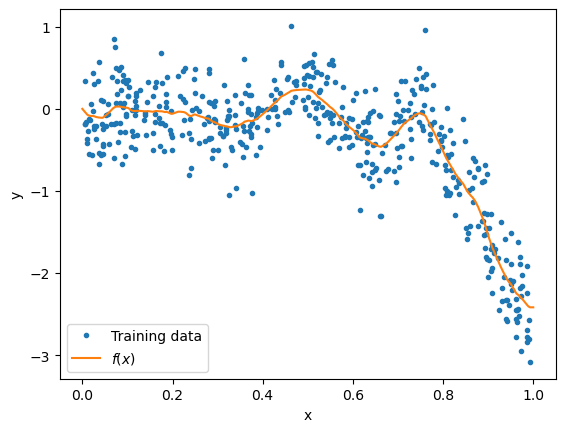

In [4]:
# Plotting
# Perform kernel ridge regression on the entire dataset using the best lambda
K_train = kernel_matrix(x_train, x_train)
reg_term_train = best_lambda * np.eye(len(x_train))
alpha_train = np.linalg.solve(K_train + reg_term_train, y_train)

# Make predictions on the test set
K_test = kernel_matrix(x_test, x_train)
predictions_test = np.dot(K_test, alpha_train)

# Calculate mean squared error on the test set
mse_test = mean_squared_error(y_test, predictions_test)
print("Test Mean Squared Error:", mse_test)

# Plot the predictions on the grid
K_grid = kernel_matrix(regGrid, x_train)
predictions_grid = np.dot(K_grid, alpha_train)

plt.figure()
plt.plot(x_train, y_train, '.', label='Training data')
plt.plot(regGrid, predictions_grid, linestyle='-', label='$f(x)$')
plt.legend(loc='lower left')
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('hw4reg.pdf', bbox_inches='tight')
plt.show()



# Problem 5

In [5]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

words_to_compare = ['excellent', 'amazing', 'delicious', 'fantastic', 'gem', 'perfectly', 'incredible', 'worst', 'mediocre', 'bland', 'meh', 'awful', 'horrible', 'terrible']
k_to_try = [ 2, 4, 8 ]
vocab = {}
vocab_size = 0
reviews = []

with open('reviews_limited_vocab.txt', 'r') as f:
    for line in f.readlines():
        words = line.strip().split(' ')
        for word in words:
            if word not in vocab:
                vocab[word] = vocab_size
                vocab_size += 1
        reviews.append([vocab[word] for word in words])

invert_vocab = [''] * vocab_size
for (word, word_id) in vocab.items():
    invert_vocab[word_id] = word
invert_vocab = np.array(invert_vocab)


def reviewPrinter(reviews, reviewNum, invert_vocab):
    ans = []
    for num in reviews[reviewNum]:
        ans.append(invert_vocab[num])
    print(ans)

print(words_to_compare)
print(vocab_size)
print(len(vocab))
print(len(reviews))
print(len(invert_vocab))

reviewPrinter(reviews, 5, invert_vocab)




['excellent', 'amazing', 'delicious', 'fantastic', 'gem', 'perfectly', 'incredible', 'worst', 'mediocre', 'bland', 'meh', 'awful', 'horrible', 'terrible']
1731
1731
100000
1731
['modern', 'setting', 'for', 'the', 'chain', 'pizza', 'hard', 'walls', 'and', 'no', 'soft', 'lots', 'of', 'around', 'the', 'place', 'so', 'be', 'prepared', 'for', 'some', 'late', 'evening', 'visit', 'seated', 'at', 'of', 'the', 'restaurant', 'you', 'pass', 'the', 'service', 'area', 'at', 'one', 'side', 'to', 'pass', 'through', 'which', 'to', 'me', 'is', 'not', 'busy', 'tables', 'but', 'good', 'service', 'from', 'staff', 'who', 'knew', 'their', 'stuff', 'usual', 'menu', 'pretty', 'quick', 'service', 'as', 'you', 'might', 'expect', 'and', 'a', 'clean', 'and', 'efficient', 'set', 'up', 'very', 'city', 'location', 'should', 'mean', 'it', 'will', 'be', 'a', 'busy', 'place', 'get', 'one', 'of', 'the', 'online', 'for', 'one', 'of', 'their', 'offers', 'and', 'this', 'is', 'a', 'easy', 'meal', 'recommended']


In [6]:
# Perform LSA and cosine similarity for each k
import time
similarities = []
print("Starting")
for k in k_to_try:
    # Construct the term-document matrix
    dtm = np.zeros((len(reviews), vocab_size))
    for i, review in enumerate(reviews):
        for word_id in review:
            dtm[i, word_id] += 1
    start = time.time()
    print("Starting: linalg solver")
    
    # Singular Value Decomposition
    u, s, vt = np.linalg.svd(dtm, full_matrices=False)
    print("Finished: linalg solver", time.time()-start)
    
    # Keep the top k components
    u_k = u[:, :k]
    s_k = np.diag(s[:k])
    vt_k = vt[:k, :]
    start = time.time()
    
   
    # Project to lower-dimensional space
    print("Starting: Dot Product")
    dtm_k = np.dot(u_k, np.dot(s_k, vt_k))
    print("Finished: Dot Product", time.time()-start)
    start = time.time()
    print("Starting: Cosine Similarities")
    # Compute cosine similarity between words
    similarities.append(cosine_similarity(dtm_k.T))
    print("Finished: Cosine", time.time()-start)
    


Starting
Starting: linalg solver
Finished: linalg solver 88.98439407348633
Starting: Dot Product
Finished: Dot Product 0.36730003356933594
Starting: Cosine Similarities
Finished: Cosine 7.337939977645874
Starting: linalg solver
Finished: linalg solver 96.69584107398987
Starting: Dot Product
Finished: Dot Product 0.38715386390686035
Starting: Cosine Similarities
Finished: Cosine 7.922510147094727
Starting: linalg solver
Finished: linalg solver 97.13659119606018
Starting: Dot Product
Finished: Dot Product 0.3664231300354004
Starting: Cosine Similarities
Finished: Cosine 7.073428392410278


In [28]:
#Printing the plots
for z in range(3):
    k = k_to_try[z]
    start = time.time()
    print(f"\nResults for k={k}:\n")
    print("{:<15}".format(""), end="")
    for word in words_to_compare:
        print("{:<15}".format(word), end="")
    print("\n" + "-" * 15 * (len(words_to_compare) + 1))

    for i, word1 in enumerate(words_to_compare):
        print("{:<15}".format(word1), end="")
        for j, word2 in enumerate(words_to_compare):
            if i == j:
                print("{:<15}".format("NA"), end="")
            else:
                print("{:<15.3f}".format(similarities[z][vocab[words_to_compare[i]], vocab[words_to_compare[j]]]), end="")
        print()


Results for k=2:

               excellent      amazing        delicious      fantastic      gem            perfectly      incredible     worst          mediocre       bland          meh            awful          horrible       terrible       
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
excellent      NA             0.979          0.979          0.991          0.993          0.998          0.996          0.944          0.958          0.974          0.921          0.939          0.932          0.955          
amazing        0.979          NA             1.000          0.997          0.996          0.989          0.994          0.991          0.996          1.000          0.981          0.989          0.986          0.996          
delicious      0.979          1.000          NA             0.997          0.

Starting: Plot
Debug 1
Debug 2
Debug 2.5
Debug 3
Debug 4


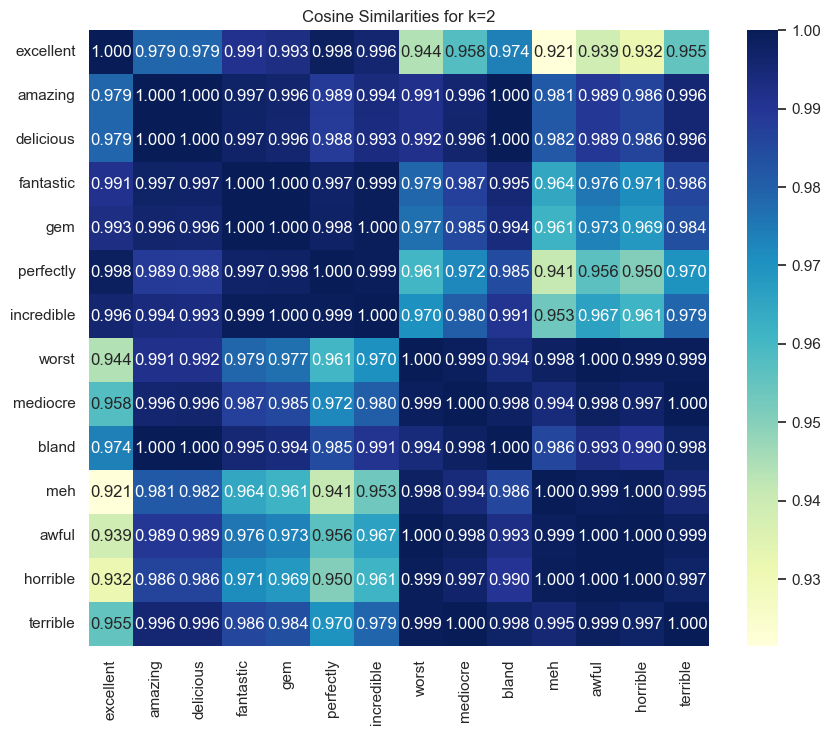

Finished: Plot 0.34384584426879883
Starting: Plot
Debug 1
Debug 2
Debug 2.5
Debug 3
Debug 4


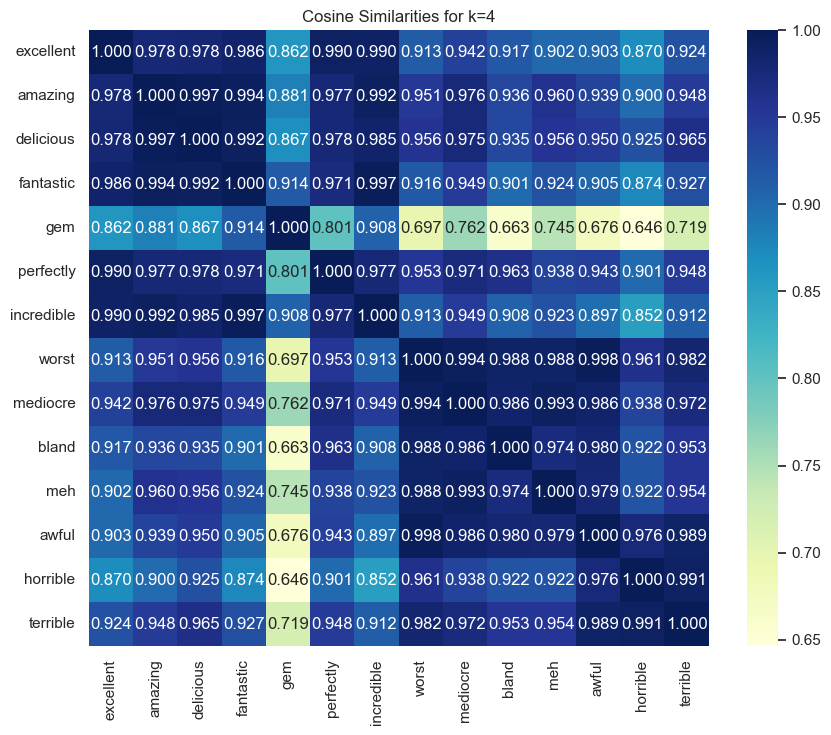

Finished: Plot 0.35269880294799805
Starting: Plot
Debug 1
Debug 2
Debug 2.5
Debug 3
Debug 4


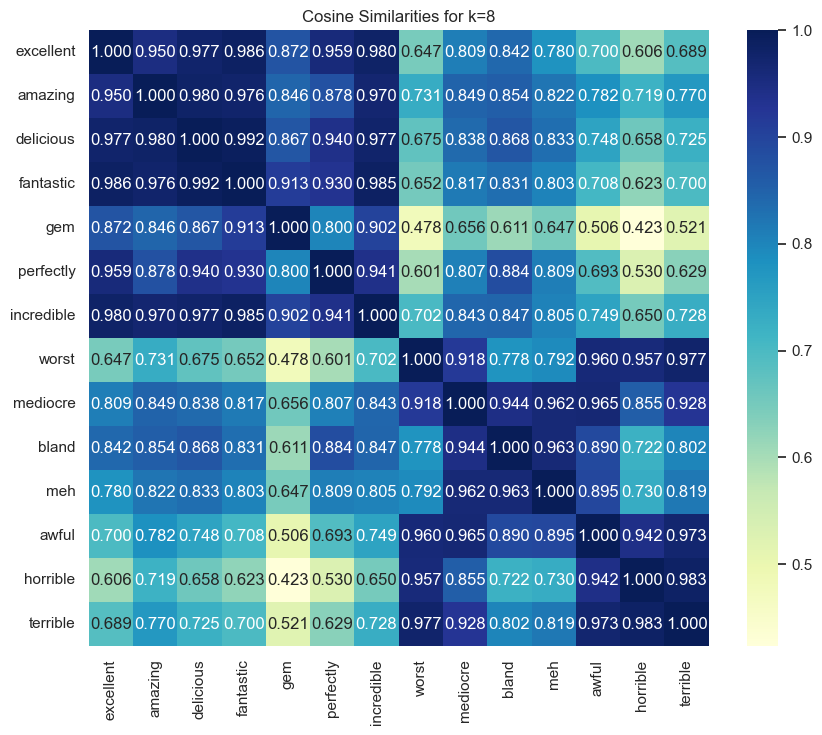

Finished: Plot 0.34360384941101074


In [40]:
# Plot separately
myToCompare = [vocab[word] for word in words_to_compare]
for i, k in enumerate(k_to_try):
    start = time.time()
    print("Starting: Plot")
    # Display results in a heatmap
    plt.figure(figsize=(10, 8))
    print("Debug 1")
    sns.set(font_scale=1)
    print("Debug 2")
    
    
    
    subset_similarities = similarities[i][myToCompare, :][:, myToCompare]
    
    subset_similarities = np.nan_to_num(subset_similarities, nan=0)
    
    print("Debug 2.5")
    sns.heatmap(subset_similarities, annot=True, fmt=".3f", cmap="YlGnBu", xticklabels=words_to_compare, yticklabels=words_to_compare)
    print("Debug 3")
    plt.title(f"Cosine Similarities for k={k}")
    print("Debug 4")
    plt.show()
    print("Finished: Plot", time.time() - start)

In [2]:
# test
# test test